In [8]:
import iris
import iris.plot as iplt
import matplotlib.pyplot as plt
import numpy as np

In [23]:
tvsbc_file = '/g/data/r87/dbi599/CMIP6/CMIP/CSIRO-ARCCSS/ACCESS-CM2/piControl/r1i1p1f1/Omon/temp-vdiffuse-sbc/gn/v20191112/temp-vdiffuse-sbc-thetao-binned_Omon_ACCESS-CM2_piControl_r1i1p1f1_gn_095001-144912.nc'
sfch_file = '/g/data/r87/dbi599/CMIP6/CMIP/CSIRO-ARCCSS/ACCESS-CM2/historical/r1i1p1f1/Omon/sfch/gn/v20191108/sfch-thetao-binned_Omon_ACCESS-CM2_historical_r1i1p1f1_gn_185001-201412.nc'
sw_file = '/g/data/r87/dbi599/CMIP6/CMIP/CSIRO-ARCCSS/ACCESS-CM2/historical/r1i1p1f1/Omon/sw-heat/gn/v20191108/sw-heat-thetao-binned_Omon_ACCESS-CM2_historical_r1i1p1f1_gn_185001-201412.nc'
frazil_file = '/g/data/r87/dbi599/CMIP6/CMIP/CSIRO-ARCCSS/ACCESS-CM2/historical/r1i1p1f1/Omon/frazil-3d/gn/v20191108/frazil-3d-thetao-binned_Omon_ACCESS-CM2_historical_r1i1p1f1_gn_185001-201412.nc'
eta_file = '/g/data/r87/dbi599/CMIP6/CMIP/CSIRO-ARCCSS/ACCESS-CM2/historical/r1i1p1f1/Omon/temp-eta-smooth/gn/v20191108/temp-eta-smooth-tos-binned_Omon_ACCESS-CM2_historical_r1i1p1f1_gn_185001-201412.nc'

In [26]:
tvsbc_cube = iris.load_cube(tvsbc_file, 'vert diffusion of heat due to surface flux')
sfch_cube = iris.load_cube(sfch_file, 'surface heat fluxes')
sw_cube = iris.load_cube(sw_file, 'downwelling_shortwave_flux_in_sea_water')
frazil_cube = iris.load_cube(frazil_file, 'ocn frazil heat flux over time step')
eta_cube = iris.load_cube(eta_file, 'surface smoother for temp')

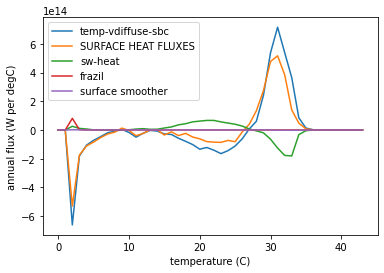

In [27]:
#plt.figure(figsize=(15, 5))
plt.plot(tvsbc_cube.data[0, :, -1], label='temp-vdiffuse-sbc')
plt.plot(sfch_cube.data[0, :, -1], label='SURFACE HEAT FLUXES')
plt.plot(sw_cube.data[0, :, -1], label='sw-heat')
plt.plot(frazil_cube.data[0, :, -1], label='frazil')
plt.plot(eta_cube.data[0, :, -1], label='surface smoother')
plt.legend()
plt.xlabel('temperature (C)')
plt.ylabel('annual flux (W per degC)')
plt.show()

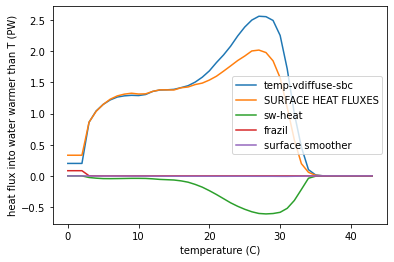

In [28]:
tvsbc_data = tvsbc_cube.data[0, :, -1]
tvsbc_reverse_cumsum = np.cumsum(tvsbc_data[::-1])[::-1] / 1e15
plt.plot(tvsbc_reverse_cumsum, label='temp-vdiffuse-sbc')

sfch_data = sfch_cube.data[0, :, -1]
sfch_reverse_cumsum = np.cumsum(sfch_data[::-1])[::-1] / 1e15
plt.plot(sfch_reverse_cumsum, label='SURFACE HEAT FLUXES')

sw_data = sw_cube.data[0, :, -1]
sw_reverse_cumsum = np.cumsum(sw_data[::-1])[::-1] / 1e15
plt.plot(sw_reverse_cumsum, label='sw-heat')

frazil_data = frazil_cube.data[0, :, -1]
frazil_reverse_cumsum = np.cumsum(frazil_data[::-1])[::-1] / 1e15
plt.plot(frazil_reverse_cumsum, label='frazil')

eta_data = eta_cube.data[0, :, -1]
eta_reverse_cumsum = np.cumsum(eta_data[::-1])[::-1] / 1e15
plt.plot(eta_reverse_cumsum, label='surface smoother')

plt.legend()
plt.xlabel('temperature (C)')
plt.ylabel('heat flux into water warmer than T (PW)')
plt.show()